In [1]:
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

from processing.converter import convert_data
from processing.preprocessing import analysis_ready_data, sparse_ard

plt.style.use('bmh')

In [2]:
# GLOBALS
SPARSE_STEP = 20
SAMPLING_FREQUENCY = 1000
CUTT_OFF_FREQ = 1
BUTTER_ORDER = 2

In [3]:
paths = sorted(glob('data/*'))
paths, len(paths)

(['data\\export1_13Nov07.mat',
  'data\\export1_15Jan08.mat',
  'data\\export1_15Nov07.mat',
  'data\\export1_19Dec07.mat',
  'data\\export1_20Dec07.mat',
  'data\\export1_21Dec07.mat',
  'data\\export1_24Jan08.mat',
  'data\\export1_2Jan08.mat',
  'data\\export1_30Nov07.mat',
  'data\\export1_3Jan08.mat',
  'data\\export1_7Jan08.mat'],
 11)

In [4]:
sub_num = 10
converted_df = convert_data(paths[sub_num], sub_num)
working_df = analysis_ready_data(converted_df, SAMPLING_FREQUENCY, 
                                 CUTT_OFF_FREQ, BUTTER_ORDER)
sparse_df = sparse_ard(working_df, SPARSE_STEP)

100%|██████████| 8/8 [00:23<00:00,  2.93s/it]


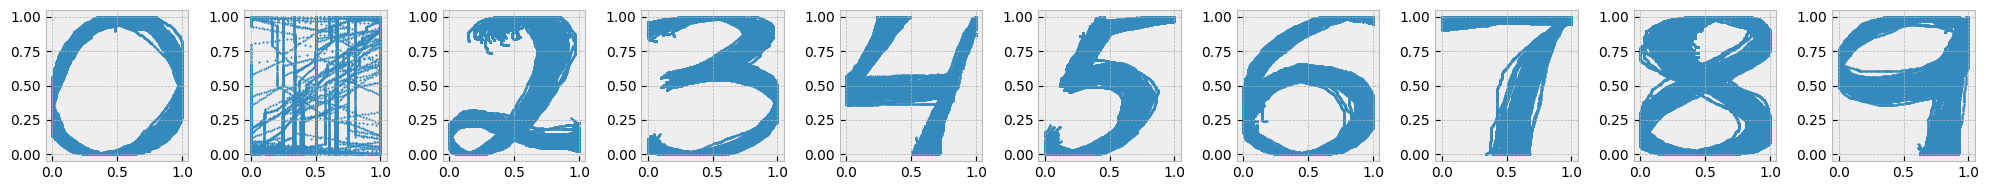

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

tmp_data = working_df
for j in range(10):
    ax[j].scatter(tmp_data[tmp_data["export_Type"] == j+1]["export_X"], 
                     tmp_data[tmp_data["export_Type"] == j+1]["export_Y"], s=1)
plt.tight_layout()

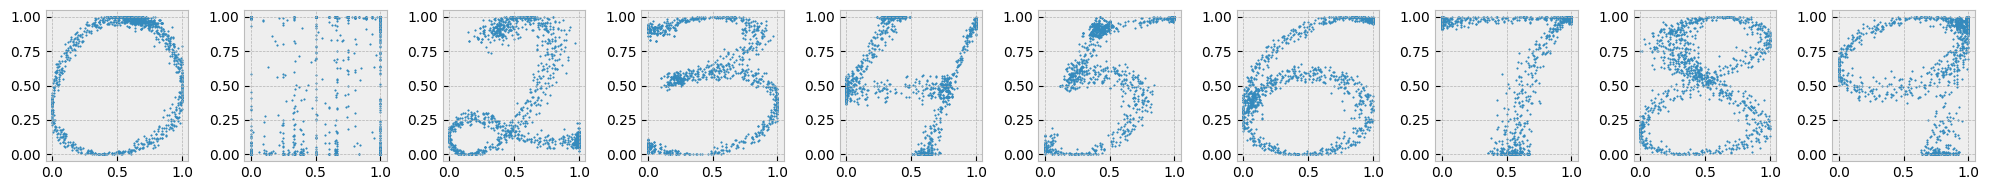

In [6]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

tmp_data = sparse_df
for j in range(10):
    ax[j].scatter(tmp_data[tmp_data["export_Type"] == j+1]["export_X"], 
                     tmp_data[tmp_data["export_Type"] == j+1]["export_Y"], s=1)
plt.tight_layout()

In [7]:
sparse_df.to_csv("subject_10.csv", index=False)